# NumpPy: (1) New Functions from Old Functions, (2) Integrate! 

NumPy is The fundamental package for scientific computing with Python. A package or module or library is a collection of functions and beyond.

In [4]:
# Import numpy and rename it to np
import numpy as np

Define a simple function

In [5]:
def f(x):
    return x**2

Evaluate the function at a particular input value (function argument).

In [6]:
z = 10
y = f(z)
print(y)

100


## Lists

In Python a list is one of the most important container type to store a set of elements. 

x_list is an ordinary Python list

In [37]:
# ordinary Python list
x_list = [2,3,4,10,20,100]

In [38]:
type(x_list)

list

Loop over the list, extract each element one by one and insert it to $f(x)$.

In [39]:
for x in x_list:
    print(x,f(x))

2 4
3 9
4 16
10 100
20 400
100 10000


Formatted printing:

In [40]:
for x in x_list:
    print(f"{x:5.1f} -> {f(x):7.1f}")

  2.0 ->     4.0
  3.0 ->     9.0
  4.0 ->    16.0
 10.0 ->   100.0
 20.0 ->   400.0
100.0 -> 10000.0


In [41]:
f(x_list) # Error. Does not work. Python does not know what to do with [2,3,4,10,20,100]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

## NumPy Arrays

Create a `numpy.ndarray` from the list.  

In [23]:
x_arr = np.array(x_list)

In [24]:
type(x_arr)

numpy.ndarray

In [43]:
f(x_arr) # This works!!! Vectorized, calculations can be parallelized internally -> Much faster

array([    4,     9,    16,   100,   400, 10000], dtype=int32)

## Different ways to create a `numpy.ndarray`

In [44]:
x_arr1 = np.array([-10,10]) # list -> ndarray
x_arr1

array([-10,  10])

In [45]:
x_arr2 = np.arange(0,10,2) # 0 <= x < 10
x_arr2

array([0, 2, 4, 6, 8])

In [46]:
x_arr3 = np.linspace(-4,4,11) # 11 values of equal distance between -1 to 4
x_arr3

array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ])

## Plot New Functions from Old Functions

In [47]:
import matplotlib.pyplot as plt

In [48]:
def f0(x):
    return x**2

In [49]:
def f1(x):
    return f0(x-2)

In [50]:
def f2(x):
    return 1/2*f1(x)

In [51]:
def f3(x):
    return -f2(x)

In [52]:
def f4(x):
    return f3(x)+2

In [53]:
legend = [ r"$f_0(x)=x^2$", 
          r"$f_1(x)=(x-2)^2$", 
          r"$f_2(x)=\frac{1}{2}(x-2)^2$", 
          r"$f_3(x)=-\frac{1}{2}(x-2)^2$", 
          r"$f_4(x)=-\frac{1}{2}(x-2)^2+2$" ]

In [54]:
x_arr = np.arange(-5,5.00000001,0.2)
x_arr

array([-5.0000000e+00, -4.8000000e+00, -4.6000000e+00, -4.4000000e+00,
       -4.2000000e+00, -4.0000000e+00, -3.8000000e+00, -3.6000000e+00,
       -3.4000000e+00, -3.2000000e+00, -3.0000000e+00, -2.8000000e+00,
       -2.6000000e+00, -2.4000000e+00, -2.2000000e+00, -2.0000000e+00,
       -1.8000000e+00, -1.6000000e+00, -1.4000000e+00, -1.2000000e+00,
       -1.0000000e+00, -8.0000000e-01, -6.0000000e-01, -4.0000000e-01,
       -2.0000000e-01,  4.4408921e-15,  2.0000000e-01,  4.0000000e-01,
        6.0000000e-01,  8.0000000e-01,  1.0000000e+00,  1.2000000e+00,
        1.4000000e+00,  1.6000000e+00,  1.8000000e+00,  2.0000000e+00,
        2.2000000e+00,  2.4000000e+00,  2.6000000e+00,  2.8000000e+00,
        3.0000000e+00,  3.2000000e+00,  3.4000000e+00,  3.6000000e+00,
        3.8000000e+00,  4.0000000e+00,  4.2000000e+00,  4.4000000e+00,
        4.6000000e+00,  4.8000000e+00,  5.0000000e+00])

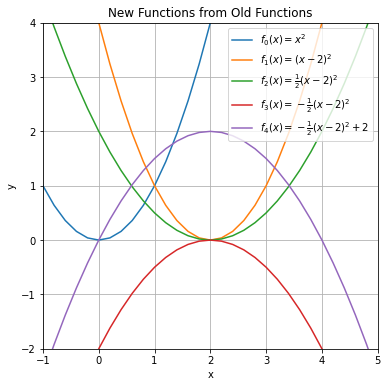

In [55]:
fig1, ax1 = plt.subplots(figsize=(6,6)) # matplotlib.pyplot.subplots()
ax1.plot(x_arr, f0(x_arr), "-")
ax1.plot(x_arr, f1(x_arr), "-")
ax1.plot(x_arr, f2(x_arr), "-")
ax1.plot(x_arr, f3(x_arr), "-")
ax1.plot(x_arr, f4(x_arr), "-")
ax1.legend(legend)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim([-1,5])
ax1.set_ylim([-2,4])
ax1.set_title("New Functions from Old Functions")
ax1.grid(True)

## Integrate $f_4(x)$ numerically from $x_L = 0$ to $x_U = 4$

The exact integral if $f_4(x)$ is:

$$ I = \int_0^4 f_4(x) dx = \int_0^4 \left( -\frac{1}{2}(x-2)^2+2 \right) dx 
= \int_{-2}^2 \left( -\frac{1}{2}z^2+2 \right) dz =\frac{16}{3} = 5\frac{1}{3} = 5.\bar{3}$$

The trapezoidal rule provides a numerical approximation of the integral.

In [56]:
# trapezoidal rule
def integrate(f, a, b, n=100):
    """
    Integrate f from a to b,
    using the Trapezoidal rule with n intervals.
    """
    x = np.linspace(a, b, n+1)    # Coordinates of the intervals
    h = x[1] - x[0]            # Interval spacing
    I = h*(sum(f(x)) - 0.5*(f(a) + f(b)))
    return I

In [57]:
help(integrate)

Help on function integrate in module __main__:

integrate(f, a, b, n=100)
    Integrate f from a to b,
    using the Trapezoidal rule with n intervals.




The numerical approximation $A$ of the integral is calculated by means of the trapezoidal rule. <br>
Try different values for $n$.


In [58]:
A = integrate(f4,0,4,n=50)

The exact integral is:

In [59]:
I = 16/3

Relative error:

In [60]:
d = (A-I)
r = d/I
print(f"Absolute difference: {d:e}")
print(f"Relative error: {r*100:.3f} %")


Absolute difference: -2.133333e-03
Relative error: -0.040 %
